# <div align="center">Projet Data Lakes & Data Integration</div>

# Membres du groupe
Adham ELBAHRAWY <br>
Anne-Lou CHARTIER <br>
Florian LEGRAND <br>
Thomas TISSERON <br>
<br>
Database Nº5 sur le server

# Objectif
Le sujet du projet est de déterminer quel état est le plus dangeruex en Inde, pour ce faire nous allons nous baser sur 5 metriques :
* Le nombre de cas de viols
* Le vol de propriété 
* Les cas de meurtres
* Le vol de véhicules
* Les violations du droit de l'Homme par la police

# Import des packages

In [94]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
import seaborn as sns
cf.go_offline()

# Source de Donnée :
# https://www.kaggle.com/datasets/rajanand/crime-in-india/data
# https://www.kaggle.com/datasets/nehaprabhavalkar/india-gis-data?rvi=1
 Année 2001-2014
 Libre d'accès

# Viol

## Import CSV

In [95]:
victims = pd.read_csv('Files/20_Victims_of_rape.csv')

## Analyse au cours des années

In [96]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()

On remarque que l'année la plus difficile est en 2005

## Analyse au cours de l'année 2005 par état

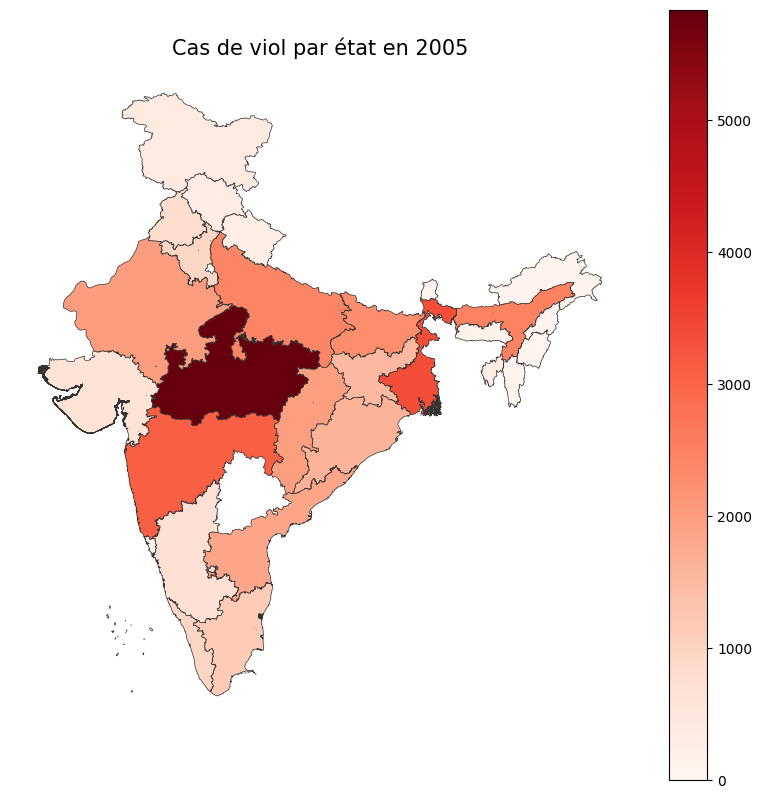

In [97]:
victims_2005 = victims[victims['Year'] == 2005]

g2 = pd.DataFrame(victims_2005.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g2.columns = ['Area_Name','Cases Reported']
g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('Files/India states/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g2.set_index('Area_Name'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Cas de viol par état en 2005',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

On focus sur l'année 2005 pour voir que c'est <strong>Madhya Pradesh</strong> qui est l'état le plus victime des viols (5 842)

## Analyse entre 2001 et 2010 par état

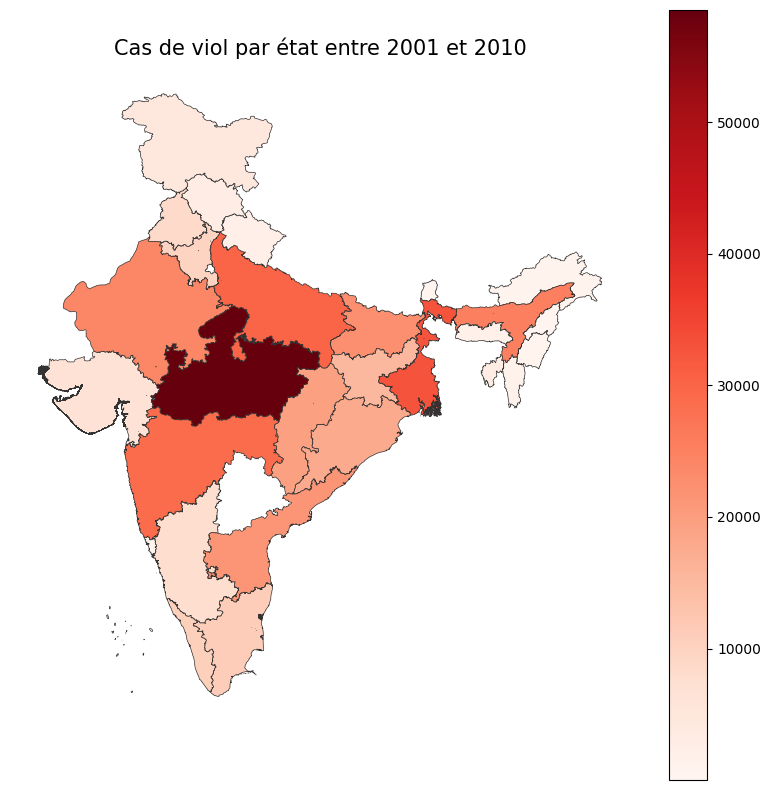

In [98]:
g1 = pd.DataFrame(victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('Files/India states//Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Cas de viol par état entre 2001 et 2010',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

<strong>Madhya Pradesh</strong> est l'état ou il y a le plus de viol (58 512 viols)

## Analyse par tranche d'âge

In [99]:
above_50 = victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Jusqu à 10','10 a 14','14 a 18','18 a 30','30 a 50','au dessus de 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()

## Analyse macro

On peut voir que les femmes entre 18 et 30 sont les plus affecté et celles qui ont plus de 50 ans les moins affecté

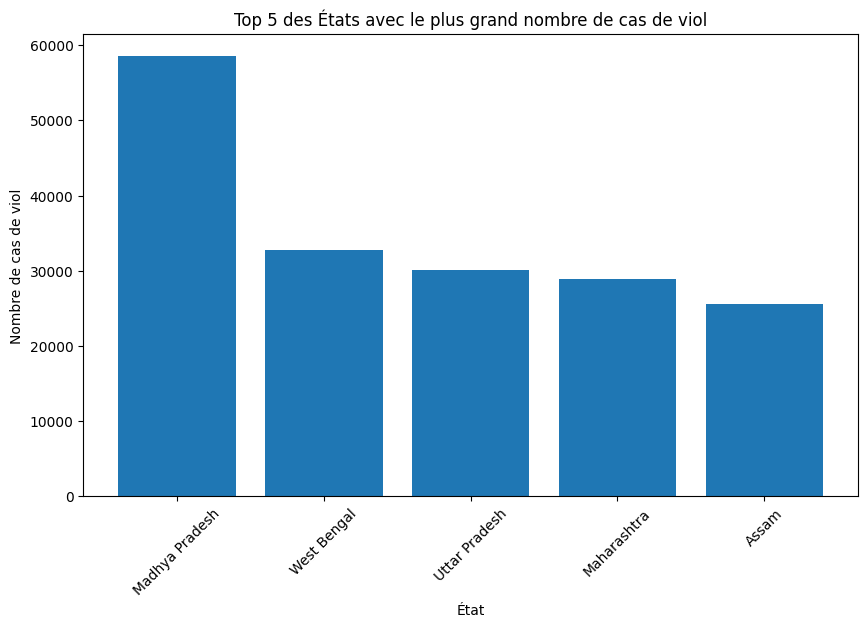

In [100]:
g3_sorted = g1.sort_values(by='Cases Reported', ascending=False)

top_5_states = g3_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['State/UT'], top_5_states['Cases Reported'])
plt.xlabel('État')
plt.ylabel('Nombre de cas de viol')
plt.title('Top 5 des États avec le plus grand nombre de cas de viol')
plt.xticks(rotation=45)  # Rotation des étiquettes d'État pour une meilleure lisibilité

plt.show()

On peut voir ici à quel point <strong>Madhya Pradesh</strong> à des statistique élevé de viol

## Analyse par ville

In [101]:
top_10_cities = g3_sorted.head(10)

fig = px.pie(top_10_cities, names='State/UT', values='Cases Reported', title='Top 10 des état avec le plus de Cas de Viol')
fig.show()

Sur un top 10 des Etats les plus touchés <strong>Madhya Pradesh </strong> est victime de 20 % des viols

# Vol de propriété

## Import CSV

In [102]:
prop_theft = pd.read_csv('Files/10_Property_stolen_and_recovered.csv')

## Évolution au cours des années
On peut observer sur le graphe ci-dessus que le vol a engendré des endomagements de plus en plus importants entre 2001 et 2010, c'est donc un critère essentiel a prendre en considérartion en parlant d'un cadre de vie serein.

In [103]:
prop_theft_vs_rec_y = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Properiétés volées', x=year, y=prop_theft_vs_rec_y['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Année',yaxis_title='Valeur en Roupies',
                 title='Valeur des propriétés volées au cours des années')
fig.show()

## Ratio entre les properiétés récupérées vs non récupérés
D'après le diagramme en camembert ci-dessus on constate que dans les 3/4 des cas environ, les victimes de vols ne retrouvent pas leurs propriétés; ce qui prouve ncore que le vol pose un constitue une vraie problématique.

In [104]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_vals = [prop_theft_stolen,prop_theft_recovered]


fig = go.Figure(data=[go.Pie(title="Propriétés volées vs récupérées", labels=['Cas de propriétés volées','Cas de propriétés récupérées'], values=prop_vals,sort=False)])

fig.show()

## Comparaison par État
On passe à une analyse géopolitique du territoire indien pour déterminer l'État concerné par le plsu de vols.

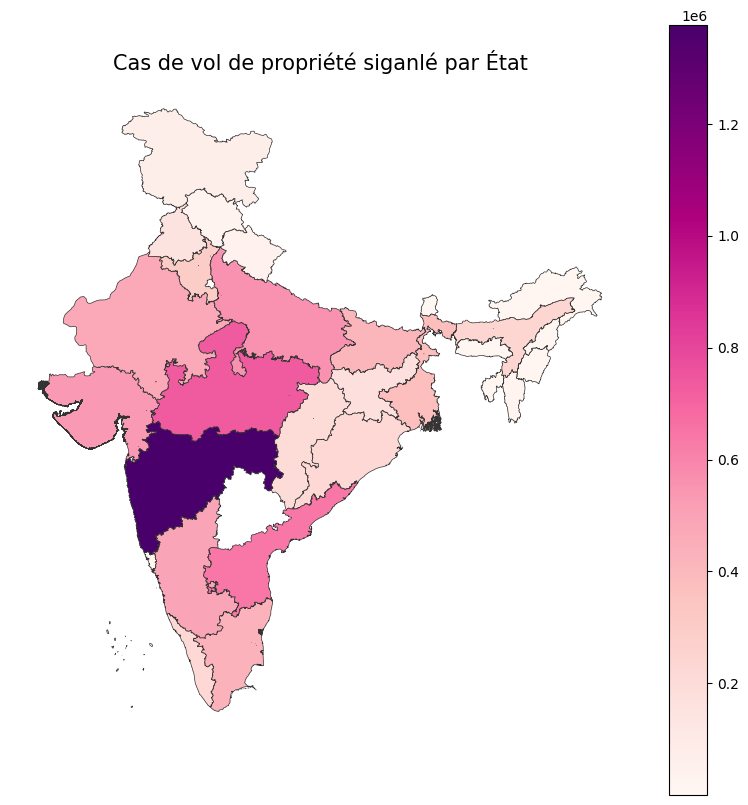

In [105]:
prop_theft_state = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
prop_theft_state.columns = ['State/UT','Cases Reported']
prop_theft_state.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

state_map = gpd.read_file('Files/India States/Indian_states.shp')
merged = state_map.set_index('st_nm').join(prop_theft_state.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Cas de vol de propriété siganlé par État',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [106]:
prop_theft_state.sort_values("Cases Reported", ascending=False).head(5)

,State/UT,Cases Reported
20,Maharashtra,1376814
19,Madhya Pradesh,733524
1,Andhra Pradesh,642822
32,Uttar Pradesh,559970
11,Gujarat,534060


En récupérant l'État le plus touché par les vols en Inde, on peut constater que celui-ci est le <strong>Maharashtra</strong> suivi directement par le <strong>Madhya Pradesh</strong>

# Meurtre

## Import CSV

In [107]:
Meurtre = pd.read_csv('Files/32_Murder_victim_age_sex.csv')

## Division des dataframes

In [108]:
gm = Meurtre[Meurtre['Group_Name']=='Murder - Total Victims']
gmfemme = Meurtre[Meurtre['Group_Name']=='Murder - Female Victims']
gmhomme = Meurtre[Meurtre['Group_Name']=='Murder - Male Victims']

## Analyse cartographique

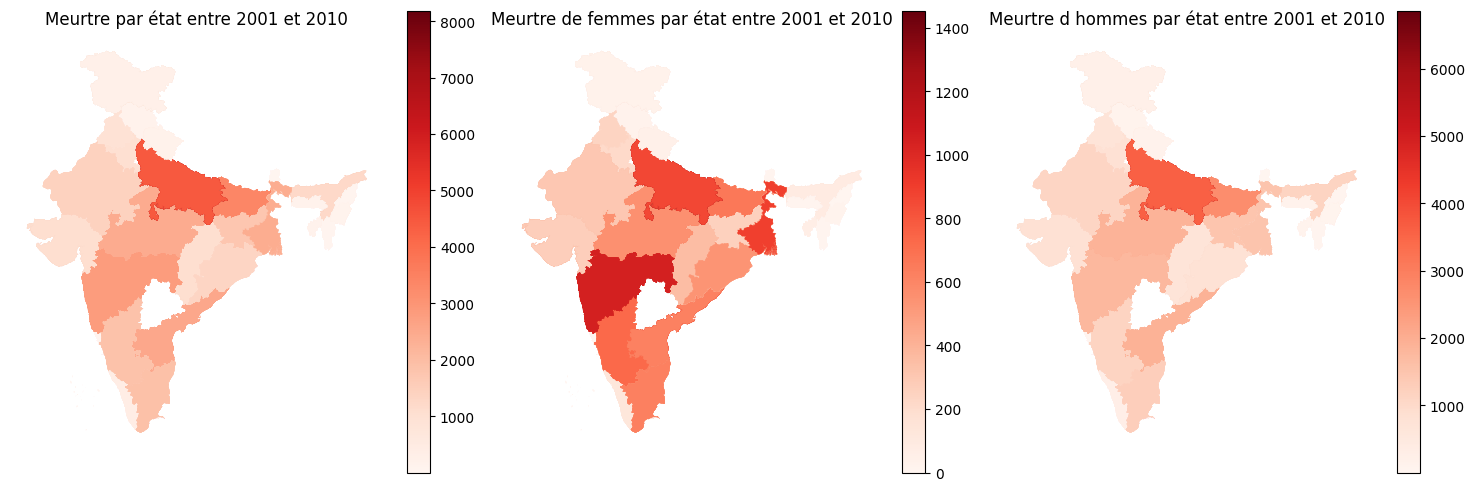

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

shp_gdf = gpd.read_file('Files/India states/Indian_states.shp')

merged1 = shp_gdf.set_index('st_nm').join(gm.set_index('Area_Name'))
gm1_ax = axes[0]
gm1_ax.axis('off')
gm1_ax.set_title('Meurtre par état entre 2001 et 2010')
merged1.plot(column='Victims_Total', cmap='Reds', legend=True, ax=gm1_ax)



merged2 = shp_gdf.set_index('st_nm').join(gmfemme.set_index('Area_Name'))
gmfemme1_ax = axes[1]
gmfemme1_ax.axis('off')
gmfemme1_ax.set_title('Meurtre de femmes par état entre 2001 et 2010')
merged2.plot(column='Victims_Total', cmap='Reds', legend=True, ax=gmfemme1_ax)


merged3 = shp_gdf.set_index('st_nm').join(gmhomme.set_index('Area_Name'))
gmhomme1_ax = axes[2]
gmhomme1_ax.axis('off')
gmhomme1_ax.set_title('Meurtre d hommes par état entre 2001 et 2010')
merged3.plot(column='Victims_Total', cmap='Reds', legend=True, ax=gmhomme1_ax)

plt.tight_layout()
plt.show()


 Sur 347 854 meurtres entre 2001 et 2010

*   81 580 étais des femmes
*   266 274 étais des hommes

La région la plus dangereuse pour les hommes <strong>et</strong> pour les femmes est <strong>Uttar Pradesh</strong> avec respectivement 47 800 et 11 010 meurtres <br></br>
On note également que l'État où les femmes sont le plus souvent victimes de meurtres est le <strong>Maharashtra</strong>

# Vol de véhicules

## Import CSV

In [110]:
auto_theft = pd.read_csv('Files/30_Auto_theft.csv')


## Explorartion du dataframe

In [111]:
auto_theft.head(2)

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725


In [112]:
auto_theft.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered',
       'Auto_Theft_Stolen'],
      dtype='object')

In [113]:
auto_theft['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

## Analyse des vols de véhicule au cours des années

In [114]:
auto_theft_vs_rec_y = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Coordinated/Traced','Auto_Theft_Recovered', 'Auto_Theft_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Auto_Theft', x=year, y=auto_theft_vs_rec_y['Auto_Theft_Recovered'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Année',yaxis_title='Valeur en Roupies', title="Valeur des véhicules volées au cours des années")
fig.show()

## Carte thermique par zone et année (pas de concentration précise à certains endroits)

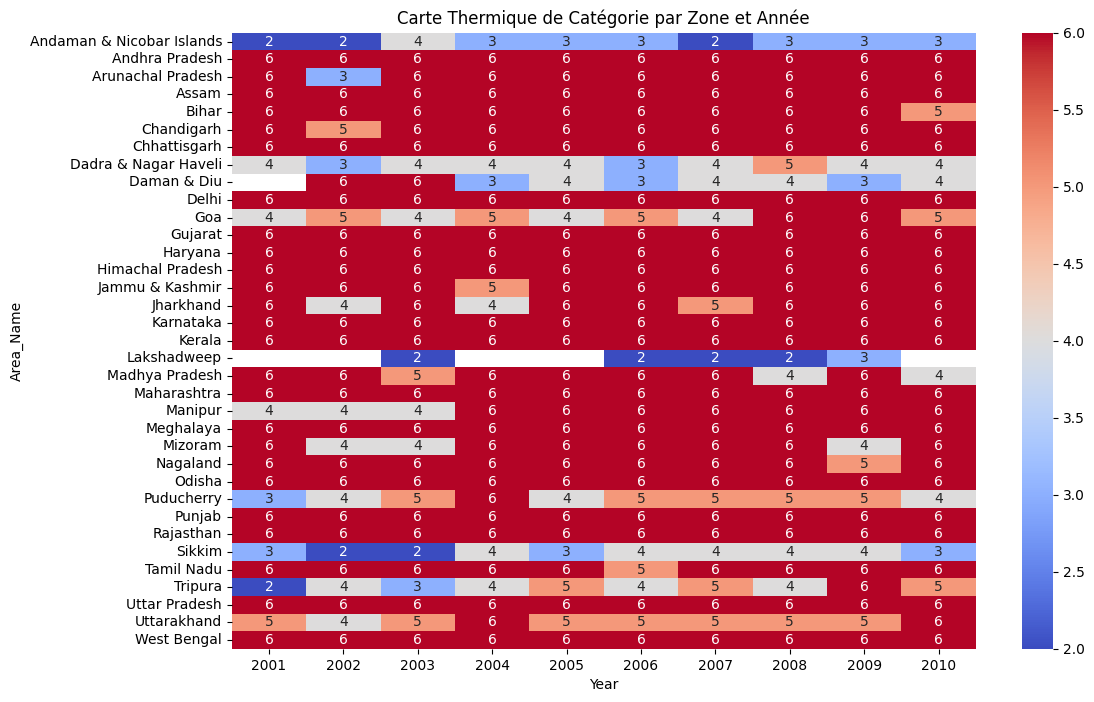

In [115]:
pivot_data = auto_theft.pivot_table(index='Area_Name', columns='Year', values='Group_Name', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt="g")
plt.title("Carte Thermique de Catégorie par Zone et Année")
plt.show()

On remarque que <strong>Madhya Pradesh</strong> et le <strong>Maharashtra</strong> sont encore une fois une des zones les plus touchées, même si en 2010 la situation a l'air de s'améliorer pour ce premier

## Véhicules récupérées vs jamais retrouvées

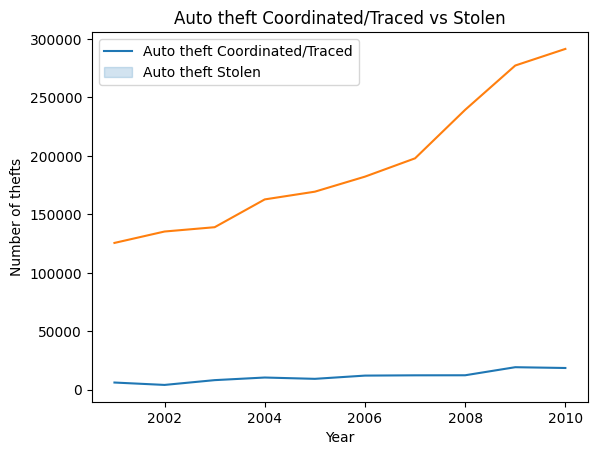

In [116]:
Auto_Theft_CT = auto_theft.groupby('Year')["Auto_Theft_Coordinated/Traced"].sum()
#Auto_Theft_Recovered = auto_theft.groupby('Year')["Auto_Theft_Recovered"].sum()
Auto_Theft_Stolen = auto_theft.groupby('Year')["Auto_Theft_Stolen"].sum()

sns.lineplot(x = Auto_Theft_CT.index, y = Auto_Theft_CT)
sns.lineplot(x = Auto_Theft_CT.index, y=Auto_Theft_Stolen).set(xlabel ="Year", ylabel = "Number of thefts", title ='Auto theft Coordinated/Traced vs Stolen')

plt.legend(labels = ["Auto theft Coordinated/Traced", "Auto theft Stolen"])

# Violation des droits humains par la police

## Import CSV

In [117]:
police_crimes = pd.read_csv("Files/35_Human_rights_violation_by_police.csv")

## Nombre d'atteintes au droits de l'homme par années

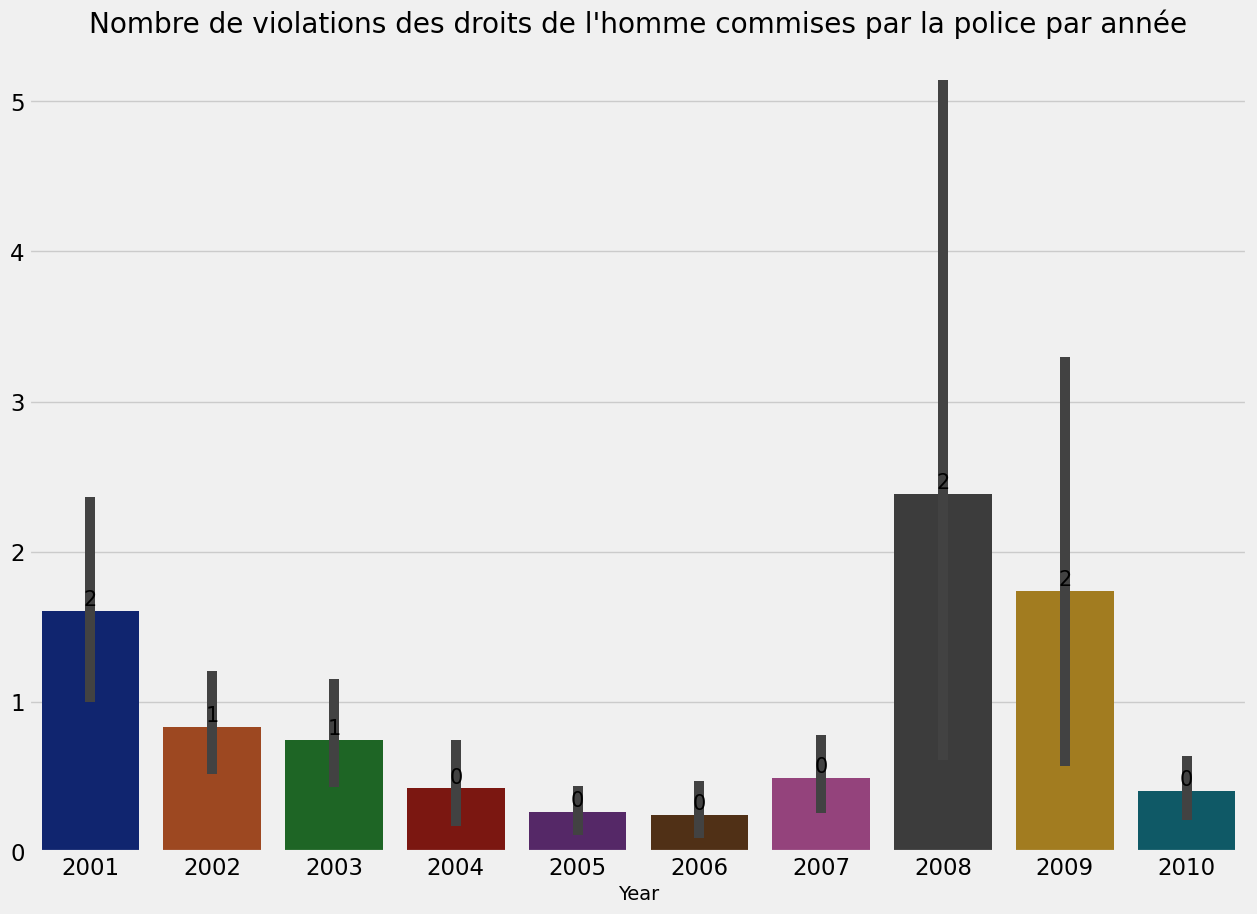

In [118]:
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Year', y='Cases_Registered_under_Human_Rights_Violations', data=police_crimes, palette='dark')
plt.title("Nombre de violations des droits de l'homme commises par la police par année")
ax.set_ylabel('')

for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                textcoords='offset points')

## Distribution des violations aux droits de l'homme par catégorie de délit

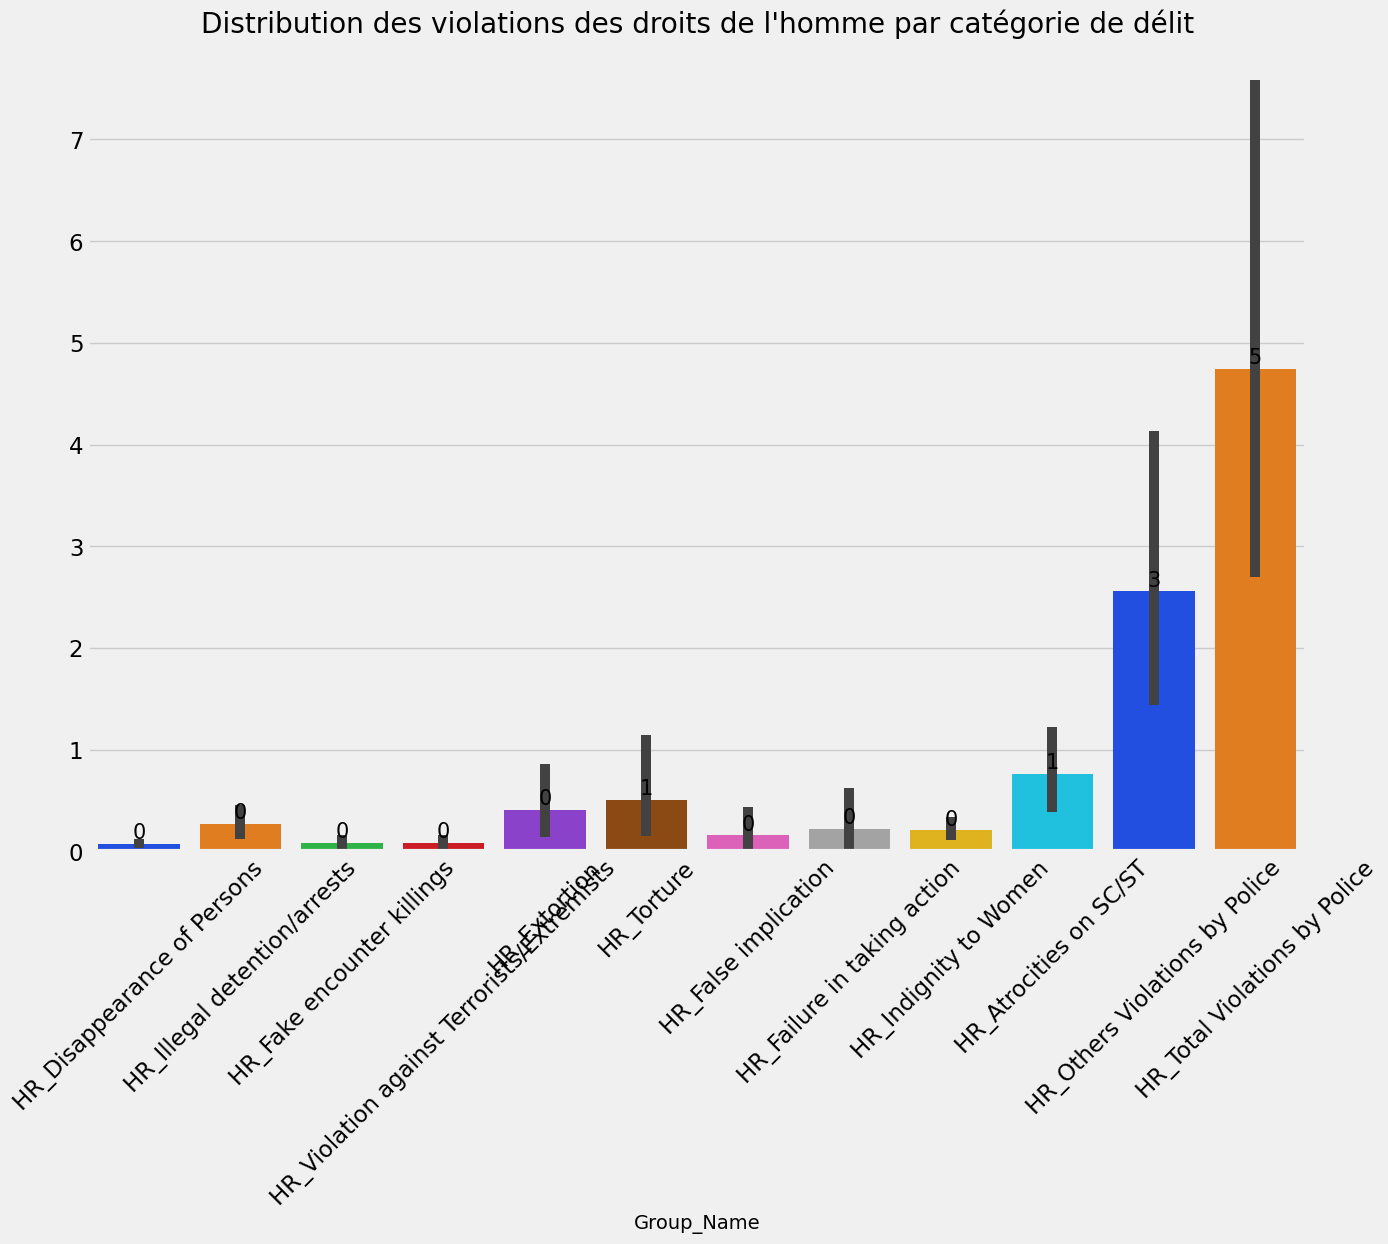

In [119]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Group_Name', y='Cases_Registered_under_Human_Rights_Violations', data=police_crimes, palette='bright')
plt.title("Distribution des violations des droits de l'homme par catégorie de délit")
ax.set_ylabel('')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                textcoords='offset points')

## Nombre de poursuites judiciaires envers la police pour violation des droits humains (par années)

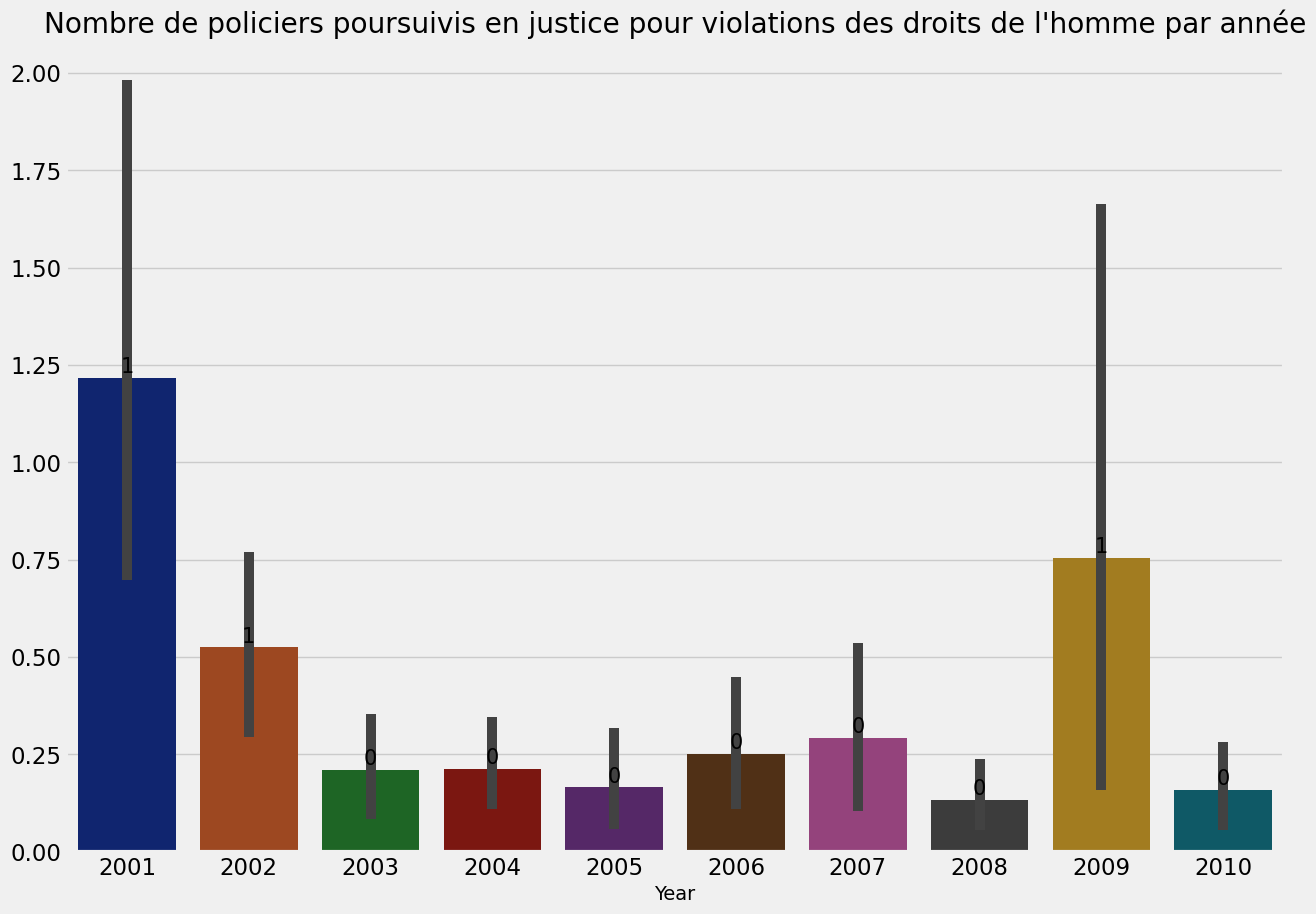

In [120]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Year', y='Policemen_Chargesheeted', data=police_crimes, palette='dark')
plt.title("Nombre de policiers poursuivis en justice pour violations des droits de l'homme par année")
ax.set_ylabel('')

for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                textcoords='offset points')


## Nombre de condamnations envers la police pour violation des droits humains (par années)

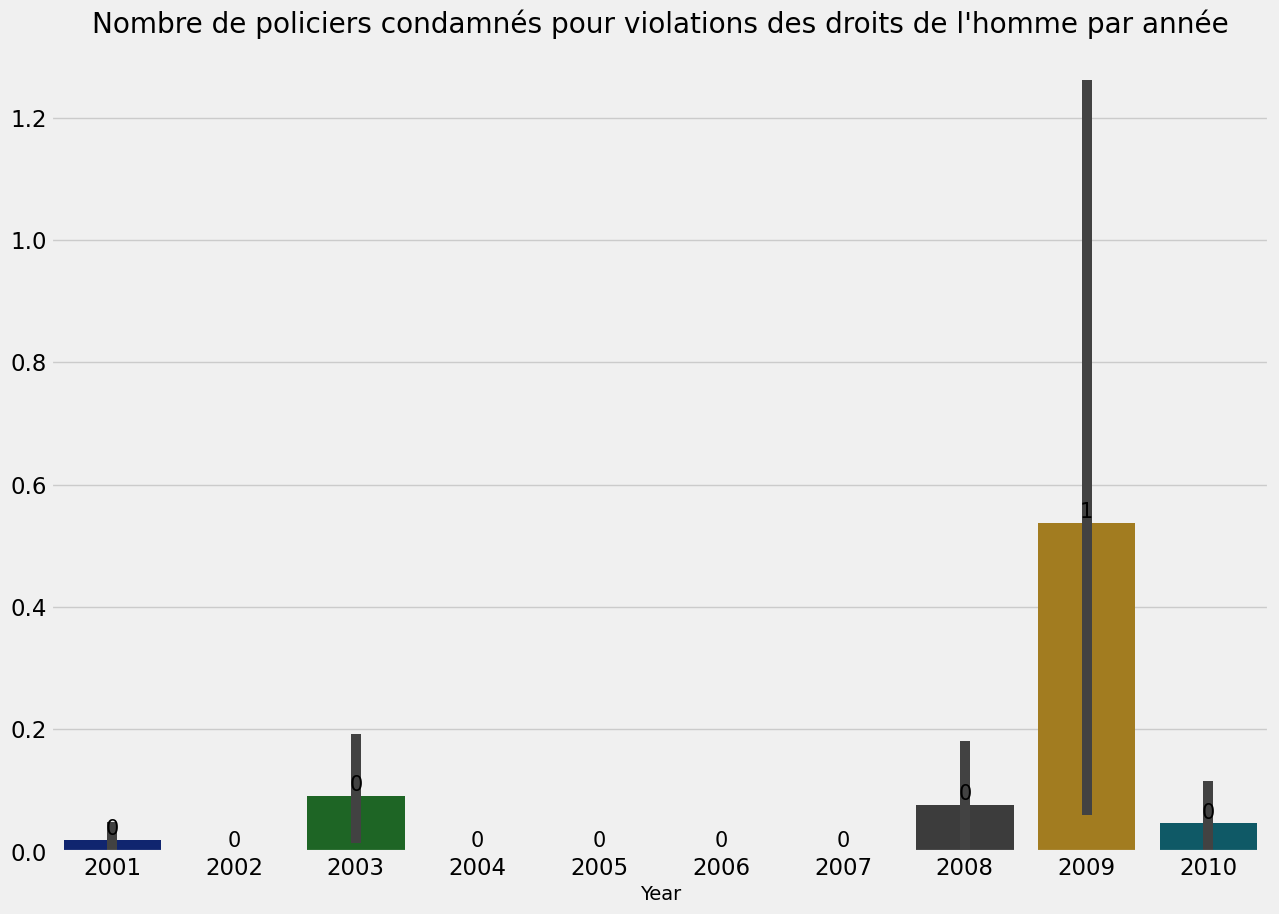

In [121]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Year', y='Policemen_Convicted', data=police_crimes, palette='dark')
plt.title("Nombre de policiers condamnés pour violations des droits de l'homme par année")
ax.set_ylabel('')

for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                textcoords='offset points')

## Régions où les délits / crimes ont été commis

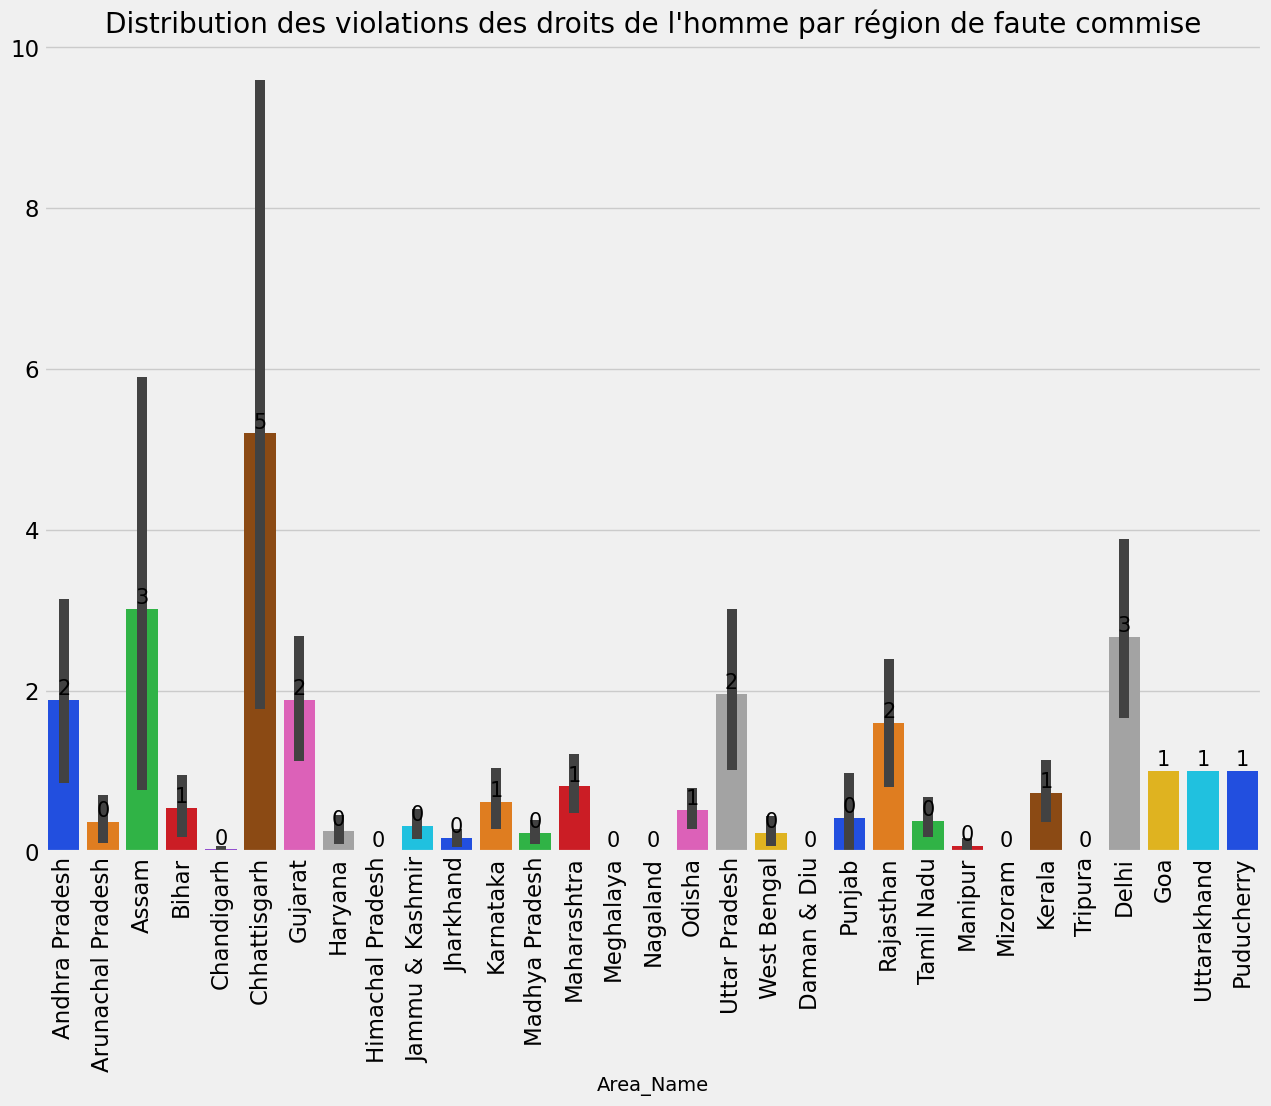

In [122]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Area_Name', y='Cases_Registered_under_Human_Rights_Violations', data=police_crimes, palette='bright')
plt.title("Distribution des violations des droits de l'homme par région de faute commise")
ax.set_ylabel('')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                textcoords='offset points')


On en déduit que l'état le plus touché globalement est le <Strong>Chhattisgarh</Strong> 

# Conclusion

Après toutes les analyses précedentes, on peut déduire que les deux états où il serait plus ou moins également dangereux de vivre en Inde sont :
* Madhya Pradesh
* Maharashtra